In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Research/Fake_News_Detection/Bangla Fake News/final_bn_data.csv")
df

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0
...,...,...,...,...
14532,National,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শ-ডাকাত বন্দুকযু‌দ্ধে ন...,বান্দরবা‌নের নাইক্ষ্যংছ‌ড়ি উপজেলায় পু‌লি‌শের স...,0.0
14533,Crime,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ ৪ জনকে জিজ্...,নিজস্ব প্রতিবেদক : সিটিসেলের নামে ৩৮৩ কোটি টাক...,1.0
14534,Education,পরীক্ষা বাতিল হওয়ায় ১ম -৩য় শ্রেণীতে ভর্তি হতে ...,১-৩ শ্রেনী পর্যন্ত পরীক্ষা বাতিলের কথা শুনে দে...,0.0
14535,Sports,এশিয়া কাপে আজ ভারত-পাকিস্তানের মহারণ,আজ এশিয়া কাপের সবচেয়ে আকর্ষণীয় ম্যাচে ভারতের ম...,0.0


**Data Pre-Pocessing**

In [ ]:
df.isnull().sum()

category    0
headline    0
content     0
label       0
dtype: int64

In [ ]:
# check class distribution
df['label'].value_counts(normalize = True)

1.0    0.6879
0.0    0.3121
Name: label, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [ ]:
#merging the news headline and title
df['content_data'] = df['headline']+' '+df['content']

In [ ]:
!pip install stemming
from stemming.porter2 import stem
df['content_data'] = df['content_data'].apply(stem)

  Preparing metadata (setup.py) ... done
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11123 sha256=52dec00dd25ccc91747f0c9d127f8a84a59d937f81bb0fbe6d11b5b18e58daf7
  Stored in directory: /root/.cache/pip/wheels/c5/f9/3f/8fe1ec182ce66145d7ded39bad9a690960469dc350fbec0181
Successfully built stemming


In [ ]:
X=df['content_data']
Y=df['label']

**Word2Vector**

In [ ]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Word2Vec model training
tokenized_texts = [text.split() for text in X]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to calculate the average vector for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Transform the training and testing data into feature vectors
X_vectors = [average_word_vectors(tokens, word2vec_model, word2vec_model.wv.index_to_key, 100) for tokens in tokenized_texts]

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

**Support Vector Machine(SVM)**

Fold: 0 0.7501146263182027
              precision    recall  f1-score   support

           0       0.79      0.23      0.36      1312
           1       0.75      0.97      0.84      3050

    accuracy                           0.75      4362
   macro avg       0.77      0.60      0.60      4362
weighted avg       0.76      0.75      0.70      4362

Fold: 1 0.7315451627693719
              precision    recall  f1-score   support

           0       0.83      0.20      0.32      1393
           1       0.72      0.98      0.83      2969

    accuracy                           0.73      4362
   macro avg       0.77      0.59      0.58      4362
weighted avg       0.76      0.73      0.67      4362

Fold: 2 0.739569005043558
              precision    recall  f1-score   support

           0       0.79      0.21      0.33      1337
           1       0.74      0.98      0.84      3025

    accuracy                           0.74      4362
   macro avg       0.76      0.59      0.58     

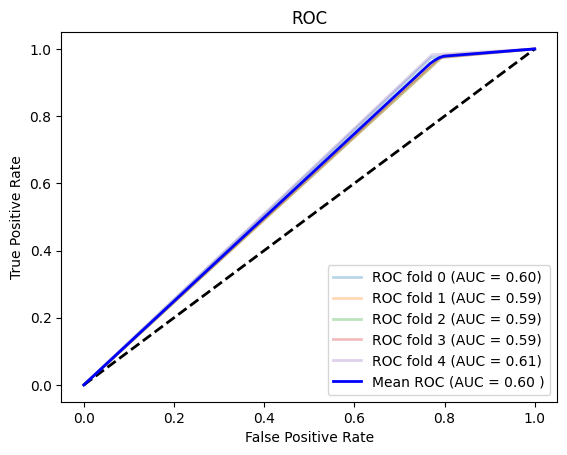

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
SVM_clf = SVC()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  SVM_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = SVM_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 309 1047]
 [  53 2953]]


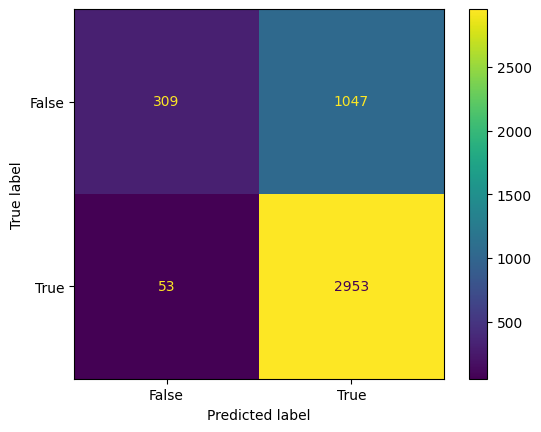

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, SVM_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Random Forest(RF)**

Fold: 0 : 0.7292526364053187
              precision    recall  f1-score   support

           0       0.59      0.33      0.42      1312
           1       0.76      0.90      0.82      3050

    accuracy                           0.73      4362
   macro avg       0.67      0.61      0.62      4362
weighted avg       0.71      0.73      0.70      4362

Fold: 1 : 0.7175607519486474
              precision    recall  f1-score   support

           0       0.62      0.30      0.40      1393
           1       0.74      0.91      0.82      2969

    accuracy                           0.72      4362
   macro avg       0.68      0.61      0.61      4362
weighted avg       0.70      0.72      0.68      4362

Fold: 2 : 0.7145804676753783
              precision    recall  f1-score   support

           0       0.57      0.28      0.37      1337
           1       0.74      0.91      0.82      3025

    accuracy                           0.71      4362
   macro avg       0.66      0.59      0.

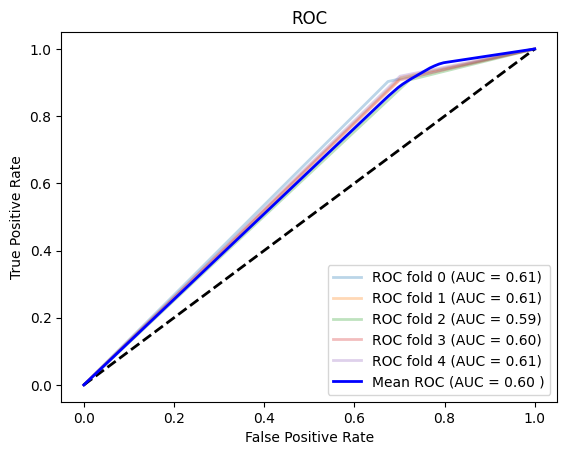

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the Random Forest classifier
rf_clf = RandomForestClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  rf_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = rf_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 405  951]
 [ 244 2762]]


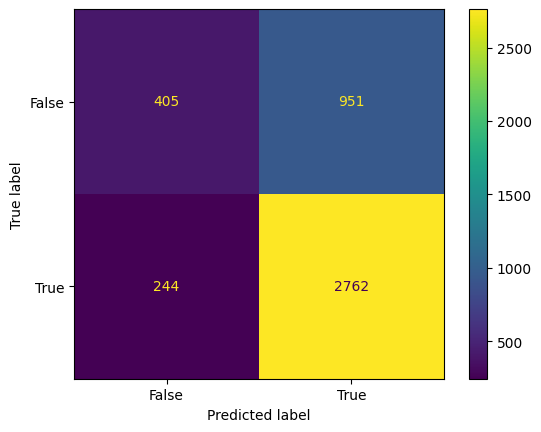

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, rf_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Decision Tree(DT)**

Fold: 0 : 0.6180651077487391
              precision    recall  f1-score   support

           0       0.39      0.46      0.42      1312
           1       0.75      0.68      0.71      3050

    accuracy                           0.62      4362
   macro avg       0.57      0.57      0.57      4362
weighted avg       0.64      0.62      0.63      4362

Fold: 1 : 0.6235671710224667
              precision    recall  f1-score   support

           0       0.41      0.44      0.42      1393
           1       0.73      0.71      0.72      2969

    accuracy                           0.62      4362
   macro avg       0.57      0.57      0.57      4362
weighted avg       0.63      0.62      0.63      4362

Fold: 2 : 0.6132508023842275
              precision    recall  f1-score   support

           0       0.38      0.41      0.40      1337
           1       0.73      0.70      0.72      3025

    accuracy                           0.61      4362
   macro avg       0.55      0.56      0.

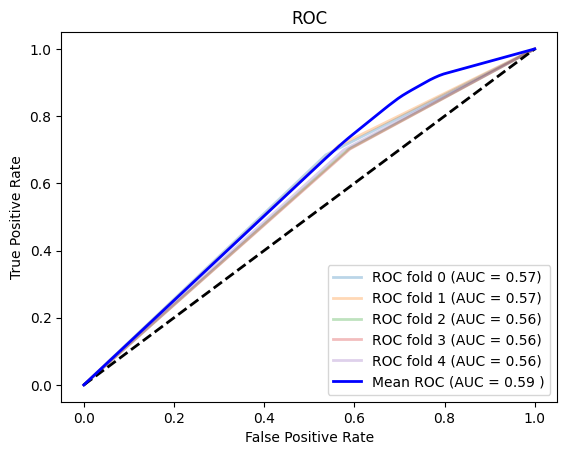

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create the Random Forest classifier
dt_clf = DecisionTreeClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  dt_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = dt_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [1]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

NameError: name 'confusion_matrix' is not defined

**Naive Bayes(NB)**

Fold: 0 : 0.6171480972031178
              precision    recall  f1-score   support

           0       0.40      0.54      0.46      1312
           1       0.77      0.65      0.70      3050

    accuracy                           0.62      4362
   macro avg       0.58      0.60      0.58      4362
weighted avg       0.66      0.62      0.63      4362

Fold: 1 : 0.6334250343878954
              precision    recall  f1-score   support

           0       0.44      0.57      0.50      1393
           1       0.77      0.67      0.71      2969

    accuracy                           0.63      4362
   macro avg       0.60      0.62      0.60      4362
weighted avg       0.66      0.63      0.64      4362

Fold: 2 : 0.6061439706556625
              precision    recall  f1-score   support

           0       0.40      0.55      0.46      1337
           1       0.76      0.63      0.69      3025

    accuracy                           0.61      4362
   macro avg       0.58      0.59      0.

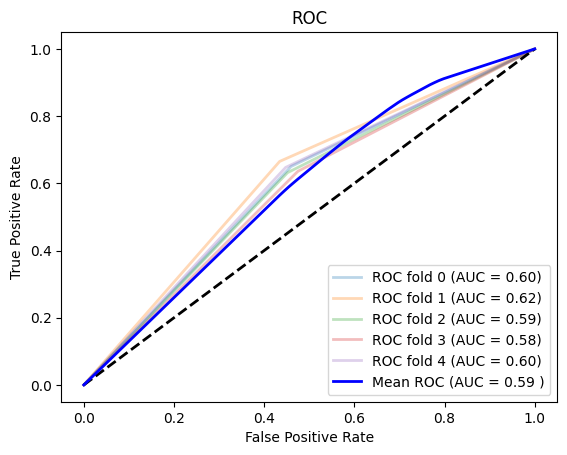

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
NB_clf = GaussianNB()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)

  # Convert sparse matrices to dense matrices
  #x_train = x_train.toarray()
  #x_test = x_test.toarray()

  # Train the classifier
  NB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = NB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [2]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

NameError: name 'confusion_matrix' is not defined

**Gradient Boosting**

Fold: 0 : 0.7418615314076112
              precision    recall  f1-score   support

           0       0.67      0.27      0.39      1312
           1       0.75      0.94      0.84      3050

    accuracy                           0.74      4362
   macro avg       0.71      0.61      0.61      4362
weighted avg       0.73      0.74      0.70      4362

Fold: 1 : 0.7260430994956442
              precision    recall  f1-score   support

           0       0.72      0.23      0.35      1393
           1       0.73      0.96      0.83      2969

    accuracy                           0.73      4362
   macro avg       0.72      0.59      0.59      4362
weighted avg       0.73      0.73      0.67      4362

Fold: 2 : 0.7276478679504814
              precision    recall  f1-score   support

           0       0.66      0.23      0.34      1337
           1       0.74      0.95      0.83      3025

    accuracy                           0.73      4362
   macro avg       0.70      0.59      0.

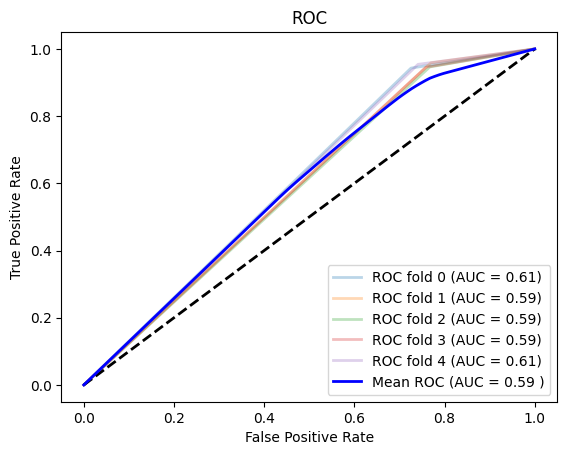

In [ ]:
#Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=0)

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  GB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = GB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 351 1005]
 [ 138 2868]]


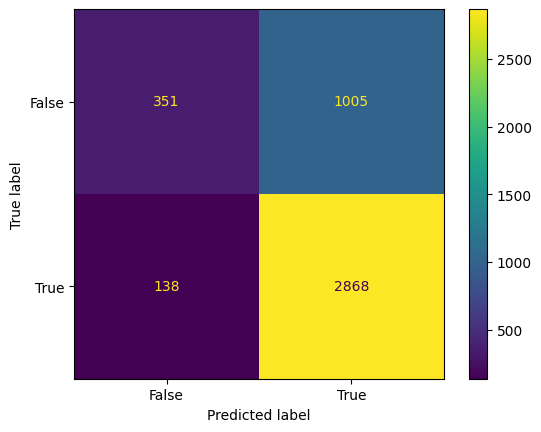

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, GB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Voting Classifier (enssemble)**

Fold: 0 : 0.7228335625859698
              precision    recall  f1-score   support

           0       0.56      0.35      0.43      1312
           1       0.76      0.88      0.82      3050

    accuracy                           0.72      4362
   macro avg       0.66      0.62      0.62      4362
weighted avg       0.70      0.72      0.70      4362

Fold: 1 : 0.7191655204034847
              precision    recall  f1-score   support

           0       0.62      0.32      0.42      1393
           1       0.74      0.91      0.81      2969

    accuracy                           0.72      4362
   macro avg       0.68      0.61      0.62      4362
weighted avg       0.70      0.72      0.69      4362

Fold: 2 : 0.7102246675836772
              precision    recall  f1-score   support

           0       0.55      0.29      0.38      1337
           1       0.74      0.89      0.81      3025

    accuracy                           0.71      4362
   macro avg       0.65      0.59      0.

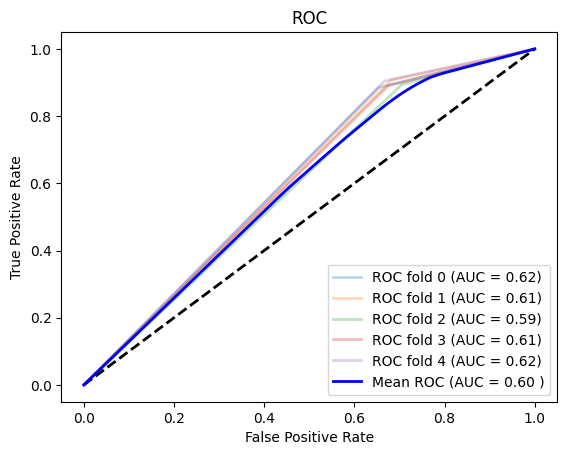

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Instantiate individual classifiers
clf_rf = RandomForestClassifier(random_state=42)
clf_gb = GradientBoostingClassifier(random_state=42)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', clf_rf), ('gb', clf_gb)], voting='hard')

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  voting_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 451  905]
 [ 286 2720]]


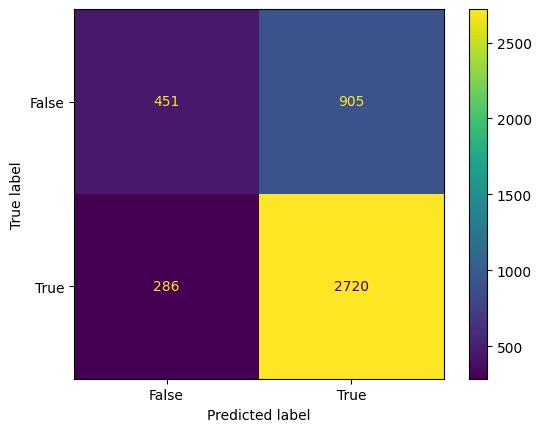

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, voting_clf .predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create a TfidfVectorizer for unigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the tf-idf matrix to a dense array for better readability
dense_array = tfidf_matrix.toarray()

# Create a pandas DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(data=dense_array, columns=feature_names)
print(df)
